In [179]:
import pandas as pd

In [180]:
df = pd.read_csv("dataR2.csv")

In [181]:
df.shape

(116, 10)

In [182]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [183]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [184]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Classification']= label_encoder.fit_transform(df['Classification'])
  
df['Classification'].unique()

array([0, 1], dtype=int64)

In [203]:
df['Classification'].sum()

64

In [186]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [187]:
from sklearn.feature_selection import chi2

X = df.drop('Classification', axis = 1)
y = df['Classification']

chi_scores = chi2(X,y)
chi_scores

(array([9.88416550e-01, 1.84711912e+00, 8.81253730e+01, 8.92038201e+01,
        4.56567842e+01, 1.84936133e-03, 2.00948765e-01, 6.19498331e+01,
        2.14917039e+02]),
 array([3.20129692e-01, 1.74118830e-01, 6.14345094e-21, 3.56160539e-21,
        1.40897236e-11, 9.65698185e-01, 6.53956118e-01, 3.52319661e-15,
        1.16188945e-48]))

<AxesSubplot:>

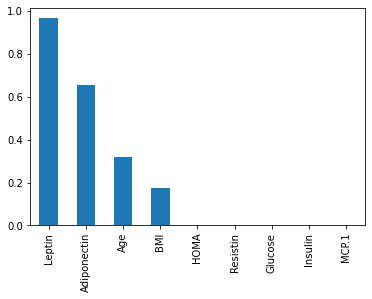

In [188]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

p_values.plot.bar()

In [189]:
X.drop('Leptin', axis = 1)

,Age,BMI,Glucose,Insulin,HOMA,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,33.750000,3.27000,392.460


In [190]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [191]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_test, y_pred):
    return confusion_matrix(y_test, y_pred)

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

dtf = DecisionTreeClassifier()
dtf = dtf.fit(X_train, y_train)
y_pred = dtf.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Confusion matrix:
 [[16  4]
 [14 13]]
Accuracy score: 0.6170212765957447
Precision: 0.7647058823529411
Recall: 0.48148148148148145


In [193]:
dtf_entropy = DecisionTreeClassifier(criterion = "entropy")
dtf_entropy = dtf_entropy.fit(X_train, y_train)
y_pred = dtf_entropy.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[10 10]
 [ 5 22]]
Accuracy score: 0.6808510638297872
Precision: 0.6875
Recall: 0.8148148148148148


In [194]:
dtf_maxdepth = DecisionTreeClassifier(max_depth = 10)
dtf_maxdepth = dtf_maxdepth.fit(X_train, y_train)
y_pred = dtf_maxdepth.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[14  6]
 [ 6 21]]
Accuracy score: 0.7446808510638298
Precision: 0.7777777777777778
Recall: 0.7777777777777778


In [195]:
dtf_maxdepth2 = DecisionTreeClassifier(max_depth = 100)
dtf_maxdepth2 = dtf_maxdepth2.fit(X_train, y_train)
y_pred = dtf_maxdepth2.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[15  5]
 [14 13]]
Accuracy score: 0.5957446808510638
Precision: 0.7222222222222222
Recall: 0.48148148148148145


In [196]:
dtf_minsamplessplit = DecisionTreeClassifier(min_samples_split = 4)
dtf_minsamplessplit = dtf_minsamplessplit.fit(X_train, y_train)
y_pred = dtf_minsamplessplit.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[15  5]
 [12 15]]
Accuracy score: 0.6382978723404256
Precision: 0.75
Recall: 0.5555555555555556


In [197]:
dtf_minsamplessplit2 = DecisionTreeClassifier(min_samples_split = 6)
dtf_minsamplessplit2 = dtf_minsamplessplit2.fit(X_train, y_train)
y_pred = dtf_minsamplessplit2.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[16  4]
 [13 14]]
Accuracy score: 0.6382978723404256
Precision: 0.7777777777777778
Recall: 0.5185185185185185


In [204]:
dtf_minsamplessplit3 = DecisionTreeClassifier(min_samples_split = 8)
dtf_minsamplessplit3 = dtf_minsamplessplit3.fit(X_train, y_train)
y_pred = dtf_minsamplessplit3.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[15  5]
 [13 14]]
Accuracy score: 0.6170212765957447
Precision: 0.7368421052631579
Recall: 0.5185185185185185


In [199]:
dtf_maxfeatures = DecisionTreeClassifier(max_features = "auto")
dtf_maxfeatures = dtf_maxfeatures.fit(X_train, y_train)
y_pred = dtf_maxfeatures.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[12  8]
 [12 15]]
Accuracy score: 0.574468085106383
Precision: 0.6521739130434783
Recall: 0.5555555555555556


In [200]:
dtf_maxfeatures2 = DecisionTreeClassifier(max_features = "sqrt")
dtf_maxfeatures2 = dtf_maxfeatures2.fit(X_train, y_train)
y_pred = dtf_maxfeatures2.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[13  7]
 [ 7 20]]
Accuracy score: 0.7021276595744681
Precision: 0.7407407407407407
Recall: 0.7407407407407407


In [201]:
dtf_maxfeatures3 = DecisionTreeClassifier(max_features = "log2")
dtf_maxfeature3 = dtf_maxfeatures3.fit(X_train, y_train)
y_pred = dtf_maxfeatures3.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[ 6 14]
 [13 14]]
Accuracy score: 0.425531914893617
Precision: 0.5
Recall: 0.5185185185185185


#### Out of all the parameters (criterion = "entropy", max_depth = 10, max_features = "sqrt", min_samples_split = 4) are the best possible ones, here's a decision tree by using these parameters together.

In [206]:
dtf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 10, max_features = "sqrt", min_samples_split = 4)
dtf_entropy = dtf_entropy.fit(X_train, y_train)
y_pred = dtf_entropy.predict(X_test)

print("Confusion matrix:\n", conf_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Confusion matrix:
 [[ 8 12]
 [ 6 21]]
Accuracy score: 0.6170212765957447
Precision: 0.6363636363636364
Recall: 0.7777777777777778
